## Lab 3

In this lab we will become familiar with distributions, histograms, and functional programming. Before that, lets submit your Quiz from last lecture. Do not use numpy or any other library for this lab.

### Quiz Submission

The instructions here aim to have our course repository be public (enabling things like the colab links), while student repositories are private. You should be familiar with git from the first semester of this course. I assume that you all have github accounts and have setup things to be able to [push to github using ssh](https://docs.github.com/en/github/authenticating-to-github/connecting-to-github-with-ssh). The instuctions here lead you to:

1. Create a directory on your personal system where you will keep all course materials.
1. Clone the [course repository](https://github.com/UTA-DataScience/DATA3402.Fall.2023).
1. Create a new private repository for your solutions.
1. Copy lab notebooks from course repository to your solutions repository.
1. Commit / push your solutions.
1. Grant access to course instructors.

Ideally, you should be able to do all of these steps yourself. Below are step by step instructions with examples (including example directory naming convention). Feel free to modify things as you see fit. The goal here to have a private repo where you can submit your solutions.

1. Open a shell on your personal computer.
1. If you have not done so already, create a new directory/folder where you will keep all course material to navigate to it. For example: `mkdir Data-3402` and `cd Data-3402`.
1. Clone the course repository: `git clone https://github.com/UTA-DataScience/DATA3402.Fall.2023`.
   1. Note that after the this clone, you simply need to navigate to this directory and do `git pull` to get updates (e.g. new labs).
1. Make a new directory for your solutions and navigate to it: `mkdir DATA3402.Solutions.$USER` and `cd  DATA3402.Solutions.$USER`
1. Make new directory for Labs and Lab 2: `mkdir Labs ; mkdir Labs/Labs.2`.
1. Place your Quiz 1 solutions it this directory: `cp <path_to_solution> Labs/Labs.2 `
   1. For Lab 2 and the future labs, just copy labs from the class repo, for example here:
      * `mkdir Labs/Lab.3`
      * `cp ../DATA3402.Fall.2023/Labs/Lab.3/Lab.3.ipynb Labs/Lab.3`
1. Create a new git repository with same name are your directory above (i.e. `DATA3402.Solutions.$USER`).
   * Navigate to your page on github.
   * Use the "+" button to create a new repository.
   * Make sure your repository is private.
   * github will give you instructions on "create a new repository on the command line"
1. After creating the repository, go to the repository settings tab, select "Manage access" on left, and press "Invite a collaborator" to invite course instructor (username `afarbin`). You'll do the same for our TA, once we have one for this course.
1. To submit your labs, navigate to your private repo and
   1. Make sure you have added the lab. For example: `git add Labs/Lab.2/Lab.2.ipynb`
   1. Commit any changes: `git commit -a -m "Lab 2 updates"`
   1. Push your changes: `git push`
   1. Check on github that your solutions have been properly submitted.
   
   
After submitting Quiz 1, continue work on lab 2, or start the remainder of this lab...

### Uniform Distribution
Lets start with generating some fake random data. You can get a random number between 0 and 1 using the python random module as follow:

In [ ]:
import random
x=random.random()
print("The Value of x is", x)

The Value of x is 0.4812590174212884


Everytime you call random, you will get a new number.

*Exercise 1:* Using random, write a function `generate_uniform(N, mymin, mymax)`, that returns a python list containing N random numbers between specified minimum and maximum value. Note that you may want to quickly work out on paper how to turn numbers between 0 and 1 to between other values.

In [ ]:
# Skeleton
import random

def generate_uniform(N, mymin, mymax):
    if mymin >= mymax:
        raise ValueError("mymax must be greater than mymin")
    random_numbers = []
    for _ in range(N):
        random_value = random.random()
        mapped_value = mymin + (mymax - mymin) * random_value
        random_numbers.append(mapped_value)

    return random_numbers


In [ ]:
# Test your solution here
N = 1000
mymin = -10
mymax = 10
random_list = generate_uniform(N, mymin, mymax)
print (random_list)

[-5.411838329741334, 3.884429646455473, -3.875347732313063, -1.2394667094372593, -9.853600320861384, 6.124577134825845, -7.859233177143432, 0.5617417542285246, -0.00982659645039341, 3.0595137249751954, 6.472306266595286, 5.767088312649729, -2.6615090848741048, 0.447734150177169, 2.941447175247527, -8.355064495667172, -8.929333884453198, -7.138750300374559, -6.8961421426482055, 2.616135756797192, -7.175560746724665, 4.948122829918692, -6.769263801295655, -2.948733913764059, -3.334092606306327, -0.9558121819556966, 7.363561942863306, -9.095952793700366, -0.8992402322139696, -9.125890423010208, -4.6937940971633445, -4.421134988098244, -6.392197928501426, -3.0168130147141703, 8.400260967809317, -3.447960018381872, -5.568902925199359, 6.546193158055523, -9.399079214543223, -6.6206757176693065, -9.232912401752484, 5.476004614096588, -3.36426267243189, 3.375283198693653, -0.5814860389438721, 3.4410860482087084, 0.6709607127908761, 3.578830251769695, -2.5706323788974945, 0.18709047227100584, -

*Exercise 2a:*
Write a function that computes the mean of values in a list. Recall the equation for the mean of a random variable $\bf{x}$ computed on a data set of $n$ values $\{ x_i \} = \{x_1, x_2, ..., x_n\}$  is ${\bf\bar{x}} = \frac{1}{n} \sum_i^n x_i$.

In [ ]:
# Skeleton
def mean(data):
    if not data:
      raise ValueError("Input list is empty, cannot compute mean")

    total_sum = sum(data)
    mean = total_sum/len(data)

    return mean

In [ ]:
# Test your solution here
data = [1, 2, 3, 4, 5]
mean_value = mean(data)
print("Mean:", mean_value)

Mean: 3.0


*Exercise 2b:*
Write a function that computes the variance of values in a list. Recall the equation for the variance of a random variable $\bf{x}$ computed on a data set of $n$ values $\{ x_i \} = \{x_1, x_2, ..., x_n\}$  is ${\bf\langle x \rangle} = \frac{1}{n} \sum_i^n (x_i - {\bf\bar{x}})$.

In [ ]:
# Skeleton
def variance(data):
    if not data:
      raise ValueError("Input list is empty, cannot compute variance")

    mean = sum(data)/len(data)
    squared_diff = [(x - mean) ** 2 for x in data]
    variance = sum(squared_diff)/len(data)

    return variance

In [ ]:
# Test your solution here
data = [1, 2, 3, 4, 5]
variance_value = variance(data)
print("Variance:", variance_value)

Variance: 2.0


## Histogramming

*Exercise 3:* Write a function that bins the data so that you can create a histogram. An example of how to implement histogramming is the following logic:

* User inputs a list of values `x` and optionally `n_bins` which defaults to 10.
* If not supplied, find the minimum and maximum (`x_min`,`x_max`) of the values in x.
* Determine the bin size (`bin_size`) by dividing the range of the function by the number of bins.
* Create an empty list of zeros of size `n_bins`, call it `hist`.
* Loop over the values in `x`
    * Loop over the values in `hist` with index `i`:
        * If x is between `x_min+i*bin_size` and `x_min+(i+1)*bin_size`, increment `hist[i].`
        * For efficiency, try to use continue to goto the next bin and data point.
* Return `hist` and the list corresponding of the bin edges (i.e. of `x_min+i*bin_size`).    

In [ ]:
# Solution
def create_histogram(x, n_bins=10):
    x_min = min(x)
    x_max = max(x)

    bin_size = (x_max - x_min) / n_bins

    hist = [0] * n_bins

    bin_edges = []

    for value in x:
        in_bin = False

        for i in range(n_bins):
            bin_start = x_min + i * bin_size
            bin_end = x_min + (i + 1) * bin_size

            if bin_start <= value < bin_end:
                hist[i] += 1
                in_bin = True
                break

        if not in_bin:
            hist[-1] += 1

    for i in range(n_bins):
        bin_edges.append(x_min + i * bin_size)
    bin_edges.append(x_max)

    return hist, bin_edges


In [ ]:
# Test your solution here
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
histogram, bin_edges = create_histogram(data)
print("Histogram:", histogram)
print("Bin Edges:", bin_edges)

Histogram: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Bin Edges: [1.0, 1.9, 2.8, 3.7, 4.6, 5.5, 6.4, 7.3, 8.2, 9.1, 10]


*Exercise 4:* Write a function that uses the histogram function in the previous exercise to create a text-based "graph". For example the output could look like the following:
```
[  0,  1] : ######
[  1,  2] : #####
[  2,  3] : ######
[  3,  4] : ####
[  4,  5] : ####
[  5,  6] : ######
[  6,  7] : #####
[  7,  8] : ######
[  8,  9] : ####
[  9, 10] : #####
```

Where each line corresponds to a bin and the number of `#`'s are proportional to the value of the data in the bin.

In [ ]:
# Solution
def draw_histogram(histogram, bin_edges):
  for i in range(len(histogram)):
    bin_start = bin_edges[i]
    bin_end = bin_edges[i + 1]
    count = histogram[i]
    bar = '#' * count
    print(f"[{bin_start: 2}, {bin_end: 2}] : {bar}")

In [ ]:
# Test your solution here
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
histogram, bin_edges = create_histogram(data)
draw_histogram(histogram, bin_edges)

[ 1.0,  1.9] : #
[ 1.9,  2.8] : #
[ 2.8,  3.7] : #
[ 3.7,  4.6] : #
[ 4.6,  5.5] : #
[ 5.5,  6.4] : #
[ 6.4,  7.3] : #
[ 7.3,  8.2] : #
[ 8.2,  9.1] : #
[ 9.1,  10] : #


## Functional Programming

*Exercise 5:* Write a function the applies a booling function (that returns true/false) to every element in data, and return a list of indices of elements where the result was true. Use this function to find the indices of entries greater than 0.5.

In [ ]:
def filter_indices(data, bool_func):
    true_indices = []
    for i, element in enumerate(data):
        if bool_func(element):
            true_indices.append(i)
    return true_indices

data = [0.2, 0.6, 0.8, 0.3, 0.9, 0.7]
threshold = 0.5

def is_greater_than_threshold(element):
    return element > threshold

result = filter_indices(data, is_greater_than_threshold)

print("Indices of entries greater than 0.5:", result)

Indices of entries greater than 0.5: [1, 2, 4, 5]


In [ ]:
# Test your solution here

<function filter_indices at 0x7f819408bd90>


*Exercise 6:* The `inrange(mymin,mymax)` function below returns a function that tests if it's input is between the specified values. Write corresponding functions that test:
* Even
* Odd
* Greater than
* Less than
* Equal
* Divisible by

In [ ]:
def inrange(mymin, mymax):
    def check_inrange(x):
        return mymin <= x <= mymax
    return check_inrange

def is_even():
    def check_even(x):
        return x % 2 == 0
    return check_even

def is_odd():
    def check_odd(x):
        return x % 2 != 0
    return check_odd

def is_greater_than(value):
    def check_greater_than(x):
        return x > value
    return check_greater_than

def is_less_than(value):
    def check_less_than(x):
        return x < value
    return check_less_than

def is_equal_to(value):
    def check_equal_to(x):
        return x == value
    return check_equal_to

def is_divisible_by(divisor):
    def check_divisible_by(x):
        return x % divisor == 0
    return check_divisible_by


In [ ]:
check_even = is_even()
check_odd = is_odd()

check_range = inrange(0, 10)
check_range = inrange(10,20)

check_equal_20 = is_equal_to(20)

check_divisible_by_3 = is_divisible_by(3)

num = 7
print(f"{num} is even: {check_even(num)}")
print(f"{num} is odd: {check_odd(num)}")
print(f"{num} is in the range [5, 10]: {check_range(num)}")
print(f"{num} is equal to 20: {check_equal_20(num)}")
print(f"{num} is divisible by 3: {check_divisible_by_3(num)}")

7 is even: False
7 is odd: True
7 is in the range [5, 10]: False
7 is equal to 20: False
7 is divisible by 3: False


In [ ]:
# Test your solution

*Exercise 7:* Repeat the previous exercise using `lambda` and the built-in python functions sum and map instead of your solution above.

In [ ]:
is_even = lambda x: x % 2 == 0

is_odd = lambda x: x % 2 != 0

is_greater_than = lambda x, value: x > value

is_less_than = lambda x, value: x < value

is_equal_to = lambda x, value: x == value

is_divisible_by = lambda x, divisor: x % divisor == 0

#test solutions

numbers = [7, 10, 15, 20, 25]
value_to_compare = 5

even_results = list(map(is_even, numbers))

odd_results = list(map(is_odd, numbers))

greater_than_results = list(map(lambda x: is_greater_than(x, value_to_compare), numbers))

less_than_results = list(map(lambda x: is_less_than(x, value_to_compare), numbers))

equal_to_results = list(map(lambda x: is_equal_to(x, value_to_compare), numbers))

divisible_by_results = list(map(lambda x: is_divisible_by(x, value_to_compare), numbers))

print("Numbers:", numbers)
print("Even:", even_results)
print("Odd:", odd_results)
print(f"Greater than {value_to_compare}:", greater_than_results)
print(f"Less than {value_to_compare}:", less_than_results)
print(f"Equal to {value_to_compare}:", equal_to_results)
print(f"Divisible by {value_to_compare}:", divisible_by_results)

Numbers: [7, 10, 15, 20, 25]
Even: [False, True, False, True, False]
Odd: [True, False, True, False, True]
Greater than 5: [True, True, True, True, True]
Less than 5: [False, False, False, False, False]
Equal to 5: [False, False, False, False, False]
Divisible by 5: [False, True, True, True, True]


## Monte Carlo

*Exercise 7:* Write a "generator" function called `generate_function(func,x_min,x_max,N)`, that instead of generating a flat distribution, generates a distribution with functional form coded in `func`. Note that `func` will always be > 0.  

Use the test function below and your histogramming functions above to demonstrate that your generator is working properly.

Hint: A simple, but slow, solution is to a draw random number `test_x` within the specified range and another number `p` between the `min` and `max` of the function (which you will have to determine). If `p<=function(test_x)`, then place `test_x` on the output. If not, repeat the process, drawing two new numbers. Repeat until you have the specified number of generated numbers, `N`. For this problem, it's OK to determine the `min` and `max` by numerically sampling the function.  

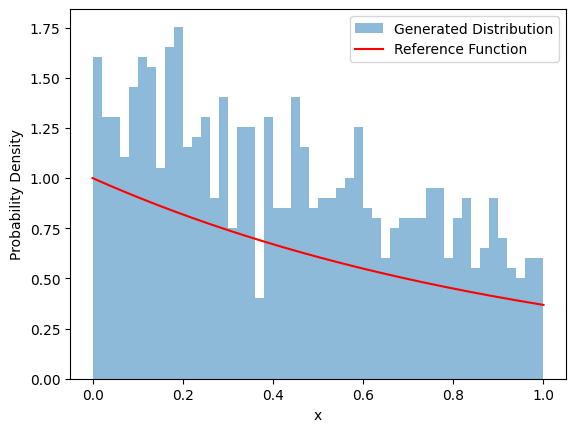

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

def generate_function(func, x_min, x_max, N):
    generated_values = []
    min_func, max_func = None, None

    for _ in range(1000):
        test_x = random.uniform(x_min, x_max)
        p = random.uniform(0, max(func(test_x), 1))
        if p <= func(test_x):
            generated_values.append(test_x)
            if min_func is None or test_x < min_func:
                min_func = test_x
            if max_func is None or test_x > max_func:
                max_func = test_x

    while len(generated_values) < N:
        test_x = random.uniform(min_func, max_func)
        p = random.uniform(0, max(func(test_x), 1))
        if p <= func(test_x):
            generated_values.append(test_x)

    return generated_values

def test_func(x):
    return 1 * np.exp(-1 * x)

def histogram(data, bins):
    return np.histogram(data, bins=bins, density=True)

def plot_distribution(data, func, x_min, x_max, num_bins):
    plt.hist(data, bins=num_bins, density=True, alpha=0.5, label='Generated Distribution')
    x = np.linspace(x_min, x_max, 1000)
    y = func(x)
    plt.plot(x, y, 'r-', label='Reference Function')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()


x_min = 0
x_max = 1
N = 1000
generated_data = generate_function(test_func, x_min, x_max, N)

plot_distribution(generated_data, test_func, x_min, x_max, num_bins=50)

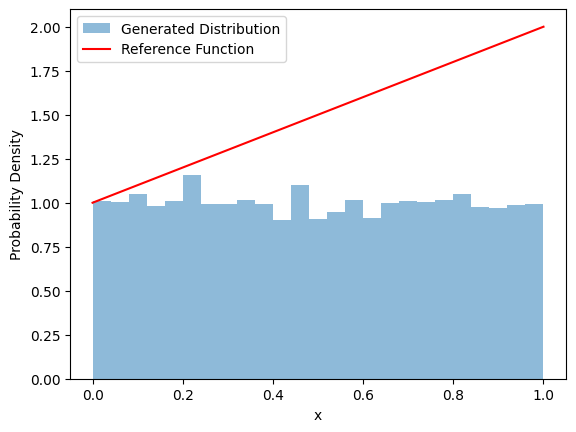

In [ ]:
# A test function
x_min = 0
x_max = 1
N = 100
generated_data = generate_function(test_func, x_min, x_max, N)

plot_distribution(generated_data, test_func, x_min, x_max, num_bins=25)

*Exercise 8:* Use your function to generate 1000 numbers that are normal distributed, using the `gaussian` function below. Confirm the mean and variance of the data is close to the mean and variance you specify when building the Gaussian. Histogram the data.

Calculated mean: 1.01
Calculated variance: 0.24


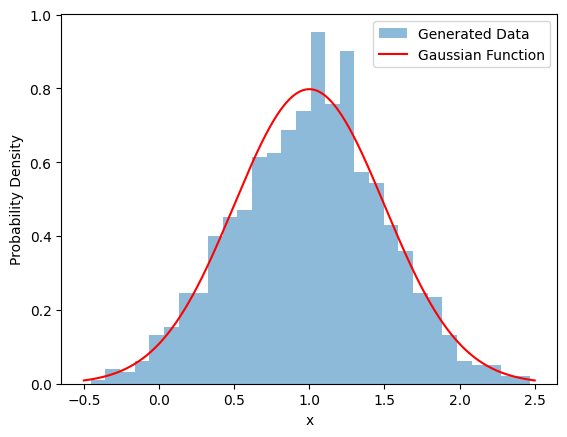

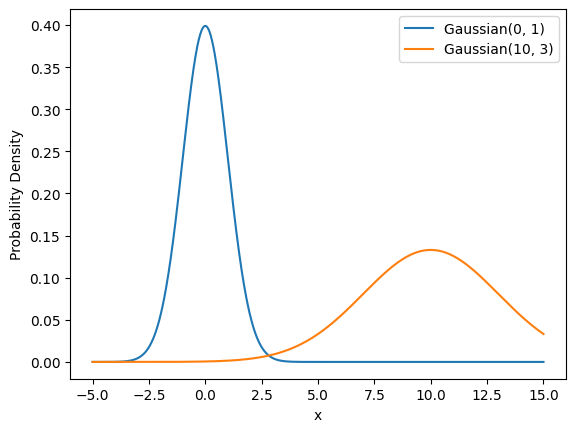

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

def generate_normal_distribution(mu, sigma, N):
    gaussian_func = lambda x: gaussian(x, mu, sigma)
    x_min = mu - 3 * sigma
    x_max = mu + 3 * sigma
    generated_data = generate_function(gaussian_func, x_min, x_max, N)
    return generated_data

mu = 1.0
sigma = 0.5
N = 1000

generated_data = generate_normal_distribution(mu, sigma, N)

data_mean = np.mean(generated_data)
data_variance = np.var(generated_data)

print(f"Calculated mean: {data_mean:.2f}")
print(f"Calculated variance: {data_variance:.2f}")

plt.hist(generated_data, bins=30, density=True, alpha=0.5, label='Generated Data')
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
y = gaussian(x, mu, sigma)
plt.plot(x, y, 'r-', label='Gaussian Function')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

g1 = lambda x: gaussian(x, 0, 1)
g2 = lambda x: gaussian(x, 10, 3)

y_values_g1 = [g1(x) for x in x_values]
y_values_g2 = [g2(x) for x in x_values]

plt.plot(x_values, y_values_g1, label='Gaussian(0, 1)')
plt.plot(x_values, y_values_g2, label='Gaussian(10, 3)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

*Exercise 9:* Combine your `generate_function`, `where`, and `in_range` functions above to create an integrate function. Use your integrate function to show that approximately 68% of Normal distribution is within one variance.

In [ ]:
import random
import numpy as np

def gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

def generate_normal_distribution(mu, sigma, N):
    gaussian_func = lambda x: gaussian(x, mu, sigma)
    x_min = mu - 3 * sigma
    x_max = mu + 3 * sigma
    generated_data = generate_function(gaussian_func, x_min, x_max, N)
    return generated_data

def integrate(func, x_min, x_max, num_points=10000):
    x_values = np.linspace(x_min, x_max, num_points)
    y_values = [func(x) for x in x_values]
    integral = np.trapz(y_values, x=x_values)
    return integral

mu = 0.0
sigma = 1.0
N = 10000

generated_data = generate_normal_distribution(mu, sigma, N)

integral_within_one_sigma = integrate(lambda x: gaussian(x, mu, sigma), mu - sigma, mu + sigma)

total_integral = integrate(lambda x: gaussian(x, mu, sigma), mu - 3 * sigma, mu + 3 * sigma)

percentage_within_one_sigma = (integral_within_one_sigma / total_integral) * 100

print(f"Percentage within one standard deviation: {percentage_within_one_sigma:.2f}%")

Percentage within one standard deviation: 68.45%
